In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
sys.path.insert(1,'/pd/maya/domino/domino')

### Mimic Slice Eval

In [3]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs
pd.set_option('display.max_rows', 1000)


/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


In [7]:
#setting_dp =run_sdms.out(18285).load() #CLIP
#setting_dp = run_sdms.out(20871).load() #MULTIMODAL
setting_dp = run_sdms.out(32313).load() #temp mult-emb test
setting_dp
#dp, _ = run_sdm.out(18287)
#dp.load()
#np.array(dp.load()['pred_slices'])
#dp, _ = run_sdm.out(run_id=row["run_sdm_run_id"])
#metrics_df = compute_sdm_metrics(dp.load())


,score_model_run_id (NumpyArrayColumn),setting_id (PandasSeriesColumn),build_setting_run_id (NumpyArrayColumn),score_settings_run_id (NumpyArrayColumn),synthetic_preds (NumpyArrayColumn),index (PandasSeriesColumn),alpha (NumpyArrayColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),slice_category (PandasSeriesColumn),slice_names (ListColumn),target_name (PandasSeriesColumn),run_sdm_run_id (PandasSeriesColumn),emb_group (PandasSeriesColumn),time_this_iter_s (PandasSeriesColumn),done (PandasSeriesColumn),timesteps_total (PandasSeriesColumn),episodes_total (PandasSeriesColumn),training_iteration (PandasSeriesColumn),experiment_id (PandasSeriesColumn),date (PandasSeriesColumn),timestamp (PandasSeriesColumn),time_total_s (PandasSeriesColumn),pid (PandasSeriesColumn),hostname (PandasSeriesColumn),node_ip (PandasSeriesColumn),time_since_restore (PandasSeriesColumn),timesteps_since_restore (PandasSeriesColumn),iterations_since_restore (PandasSeriesColumn),trial_id (PandasSeriesColumn),sdm_config/weight_y_log_likelihood (PandasSeriesColumn),sdm_config/n_slices (PandasSeriesColumn),sdm_config/emb (PandasSeriesColumn),sdm_config/xmodal_emb (PandasSeriesColumn),config/sdm (PandasSeriesColumn),config/slice (PandasSeriesColumn),logdir (PandasSeriesColumn),sdm_class (PandasSeriesColumn)
0,32271.0,06314fb9-0f25-4d5d-bcdf-ba8735a7991e,32271.0,32270.0,True,0,0.8,"{'n': 30000, 'correlate': 'pleural_effusion', 'target': 'support_devices', 'corr': 0.8}",mimic,correlation,"['support_devices=0_pleural_effusion=1', 'support_devices=1_pleural_effusion=0']",support_devices,32321.0,imagenet,20.266670,False,NaN,NaN,1.0,3485395d9bd24d83880e6b6415a46b43,2021-09-27_01-00-07,1.632704e+09,20.266670,2619.0,pod-maya,10.92.9.3,20.266670,0.0,1.0,251b3_00000,10.0,5.0,emb,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['imagenet', 'emb'], 'n_slices': 5, 'weight_y_log_likelihood': 10, 'xmodal_emb': 'emb'}}","{'alpha': 0.8, 'build_setting_kwargs': {'corr': 0.8, 'correlate': 'pleural_effusion', 'n': 30000, 'target': 'support_devices'}, 'build_setting_run_id': 32271, 'dataset': 'mimic', 'index': '159', 'score_model_run_id': 32271, 'score_settings_run_id': 32270, 'setting_id': '06314fb9-0f25-4d5d-bcdf-ba8735a7991e', 'slice_category': 'correlation', 'slice_names': ['support_devices=0_pleural_effusion=1', 'support_devices=1_pleural_effusion=0'], 'synthetic_preds': 'True', 'target_name': 'support_devices'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/32313/_evaluate_2021-09-27_00-59-19/_evaluate_251b3_00000_0_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 10, _2021-09-27_00-59-19",domino.sdm.gmm.MixtureModelSDM
1,32271.0,06314fb9-0f25-4d5d-bcdf-ba8735a7991e,32271.0,32270.0,True,1,0.8,"{'n': 30000, 'correlate': 'pleural_effusion', 'target': 'support_devices', 'corr': 0.8}",mimic,correlation,"['support_devices=0_pleural_effusion=1', 'support_devices=1_pleural_effusion=0']",support_devices,32314.0,bit,20.402009,False,NaN,NaN,1.0,840de326d79c4ac895f795400bd54861,2021-09-27_01-00-07,1.632704e+09,20.402009,2623.0,pod-maya,10.92.9.3,20.402009,0.0,1.0,251b3_00001,10.0,5.0,body,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['bit', 'body'], 'n_slices': 5, 'weight_y_log_likelihood': 10, 'xmodal_emb': 'emb'}}","{'alpha': 0.8, 'build_setting_kwargs': {'corr': 0.8, 'correlate': 'pleural_effusion', 'n': 30000, 'target': 'support_devices'}, 'build_setting_run_id': 32271, 'dataset': 'mimic', 'index': '159', 'score_model_run_id': 32271, 'score_settings_run_id': 32270, 'setting_id': '06314fb9-0f25-4d5d-bcdf-ba8735a7991e', 'slice_category': 'correlation', 'slice_names': ['support_devices=0_pleural_effusion=1', 'support_devices=1_pleural_effusion=0'], 'synthetic_preds': 'True', 'target_name': 'support_devices'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/32313/_evaluate_2021-09-27_00-59-19/_evaluate_251b3_00001_1_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 10, _2021-09-27_00-59-19",domino.sdm.gmm.MixtureModelSDM
2,32271.0,

In [4]:
#slice_df=score_sdms.out(19177).load() #CLIP
#slice_df = score_sdms.out(21752).load() #MULTIMODAL
slice_df = score_sdms.out(32328).load() #temporary multi-emb test

In [5]:
slice_df = pd.DataFrame(slice_df)
slice_df[:100]

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,run_sdm_run_id,slice_name
0,0,0,0.812771,0.2,0.20,0.24,0.068063,0.125654,0.219895,0.172775,0.053398,support_devices,32321,support_devices=0_pleural_effusion=1
1,1,0,0.793729,0.1,0.08,0.14,0.026178,0.073298,0.157068,0.345550,0.044929,support_devices,32321,support_devices=0_pleural_effusion=1
2,2,0,0.823105,0.2,0.16,0.15,0.041885,0.078534,0.136126,0.371728,0.037526,support_devices,32321,support_devices=0_pleural_effusion=1
3,3,0,0.399527,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,32321,support_devices=0_pleural_effusion=1
4,4,0,0.815019,0.4,0.20,0.13,0.031414,0.068063,0.151832,0.109948,0.028649,support_devices,32321,support_devices=0_pleural_effusion=1
5,0,1,0.069500,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,32321,support_devices=1_pleural_effusion=0
6,1,1,0.068733,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,32321,support_devices=1_pleural_effusion=0
7,2,1,0.067169,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,32321,support_devices=1_pleural_effusion=0
8,3,1,0.963440,0.5,0.56,0.48,0.130208,0.250000,0.458333,1.000000,0.176147,support_devices,32321,support_devices=1_pleural_effusion=0
9,4,1,0.072321,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,32321,support_devices=1_pleural_effusion=0


In [8]:
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
results_df[:100]


,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
0,32321,0,0,0.812771,0.2,0.20,0.24,0.068063,0.125654,0.219895,0.172775,0.053398,support_devices,support_devices=0_pleural_effusion=1,0,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
1,32321,1,0,0.793729,0.1,0.08,0.14,0.026178,0.073298,0.157068,0.345550,0.044929,support_devices,support_devices=0_pleural_effusion=1,1,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
2,32321,2,0,0.823105,0.2,0.16,0.15,0.041885,0.078534,0.136126,0.371728,0.037526,support_devices,support_devices=0_pleural_effusion=1,2,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
3,32321,3,0,0.399527,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,support_devices=0_pleural_effusion=1,3,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
4,32321,4,0,0.815019,0.4,0.20,0.13,0.031414,0.068063,0.151832,0.109948,0.028649,support_devices,support_devices=0_pleural_effusion=1,4,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
5,32321,0,1,0.069500,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,support_devices=1_pleural_effusion=0,5,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
6,32321,1,1,0.068733,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,support_devices=1_pleural_effusion=0,6,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
7,32321,2,1,0.067169,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,support_devices=1_pleural_effusion=0,7,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
8,32321,3,1,0.963440,0.5,0.56,0.48,0.130208,0.250000,0.458333,1.000000,0.176147,support_devices,support_devices=1_pleural_effusion=0,8,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
9,32321,4,1,0.072321,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,support_devices,support_devices=1_pleural_effusion=0,9,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet


In [18]:
grouped_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha", "emb_type"])['auroc'].idxmax().astype(int)]
grouped_df.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
92,32325,2,0,0.833800,0.3,0.28,0.20,0.065574,0.109290,0.213115,0.896175,0.038789,cardio_group,cardio_group=0_lung_opacity=1,92,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,bit
103,32323,3,0,0.782107,0.3,0.24,0.20,0.060109,0.109290,0.202186,0.387978,0.042187,cardio_group,cardio_group=0_lung_opacity=1,103,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,clip
82,32324,2,0,0.846756,0.4,0.24,0.21,0.065574,0.114754,0.169399,0.737705,0.044880,cardio_group,cardio_group=0_lung_opacity=1,82,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,imagenet
112,32326,2,0,0.821611,0.6,0.44,0.28,0.087432,0.153005,0.251366,0.852459,0.043882,cardio_group,cardio_group=0_lung_opacity=1,112,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,mimic_multimodal
96,32325,1,1,0.968110,0.2,0.52,0.54,0.130653,0.271357,0.477387,0.899497,0.173618,cardio_group,cardio_group=1_lung_opacity=0,96,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,bit


/tmp/ipykernel_1138/3972853134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.5)
/tmp/ipykernel_1138/3972853134.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(1)


<AxesSubplot:xlabel='alpha', ylabel='success'>

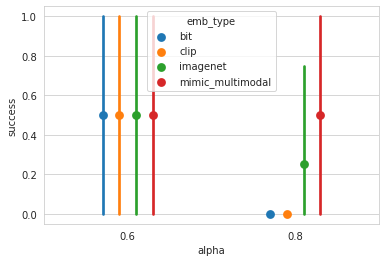

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')

sns.set_style("whitegrid")
sns.despine()
grouped_df["alpha"] = grouped_df["alpha"].round(1)
sns.pointplot(
    data=grouped_df, hue="emb_type", y="success", x="alpha", linestyles="", dodge=0.3,  
)
#plt.savefig("mimic_correlation.pdf")

In [103]:
multimodal_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha"])['auroc'].idxmax().astype(int)]
multimodal_df.head()

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
1022,20974,2,0,0.822896,0.9,0.84,0.72,0.050431,0.088561,0.154982,0.852399,0.167553,atelectasis,atelectasis=0_cardio_group=1,1022,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0,mimic_multimodal
1073,20980,3,0,0.813039,0.3,0.36,0.37,0.026987,0.055472,0.106447,1.000000,0.138095,atelectasis,atelectasis=0_cardio_group=1,1073,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,mimic_multimodal
1114,20983,4,0,0.832836,0.6,0.72,0.46,0.052838,0.090020,0.156556,0.731898,0.096741,atelectasis,atelectasis=0_cardio_group=1,1114,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.4,mimic_multimodal
1153,20987,3,0,0.822432,0.5,0.44,0.43,0.077160,0.132716,0.191358,0.848765,0.066943,atelectasis,atelectasis=0_cardio_group=1,1153,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.6,mimic_multimodal
1193,20991,3,0,0.850673,0.3,0.32,0.22,0.078788,0.133333,0.260606,0.812121,0.036803,atelectasis,atelectasis=0_cardio_group=1,1193,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.8,mimic_multimodal


/tmp/ipykernel_15973/599967079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
/tmp/ipykernel_15973/599967079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df["alpha"] = multimodal_df["alpha"].round(1)


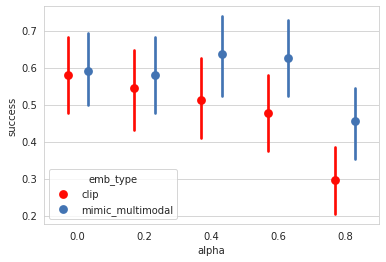

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')

sns.set_style("whitegrid")
sns.despine()
multimodal_df["alpha"] = multimodal_df["alpha"].round(1)
frames = [grouped_df, multimodal_df]
result = pd.concat(frames)

sns.pointplot(
    data=result, palette=["C0", "C1", "k"], hue='emb_type', color="purple", y="success", x="alpha", linestyles="", dodge=0.3,  
    
)
#sns.pointplot(
#    data=grouped_df, color="darkorange", y="success", x="alpha", linestyles="", dodge=0.3,  
#)
plt.savefig("mimic_correlation.pdf")